In [ ]:
pip install sysidentpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Final Dataset.xlsx to Final Dataset.xlsx


In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy pandas matplotlib statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [ ]:
%matplotlib inline
var=pd.read_excel('Final Dataset.xlsx', sheet_name='Model_Dataset', skiprows=[0, 2]) 
# var.dropna(inplace=True)
var.head()

,Date,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD,Power,Ground Transport,Residential,Domestic Aviation,International Aviation
0,2019-01-03,-0.283723,-0.146478,-0.218059,-0.242175,-0.213296,-0.133797,0.272976,-0.350994,-0.212519,-0.541858,0.017161,0.100704,-0.013013,0.037922,0.026545
1,2019-01-04,0.250258,0.067790,0.155431,0.110796,0.026443,-0.276461,-0.199125,0.001564,0.155184,-0.798119,0.015954,0.002050,-0.008488,-0.013425,0.013110
2,2019-01-05,0.034520,0.058029,0.065619,0.024849,0.003227,0.448817,-1.063302,-0.364719,0.394051,0.533827,-0.031367,-0.072048,-0.042761,-0.084376,0.028308
3,2019-01-06,0.314991,0.085648,-0.032553,0.056192,0.085732,0.716078,-0.655398,0.427898,0.268170,1.404755,-0.020110,-0.145075,-0.015340,0.001235,0.016680
4,2019-01-07,-0.092145,-0.068087,-0.175156,-0.115993,0.013049,-0.117139,0.675955,-0.436056,-0.465483,-1.400369,0.045889,0.199612,0.012749,0.042424,-0.069635


In [ ]:
ADAUSD_var=var.iloc[:, 6]


In [ ]:
output_var=var.iloc[:, 11]

In [ ]:
var.isna()

,Date,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD,Power,Ground Transport,Residential,Domestic Aviation,International Aviation
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
var=var.drop(columns=["BTC-USD", "ETH-USD",	"USDT-USD",	"XRP-USD", "BNB-USD",	"BITG-USD",	"MIOTA-USD",	"XNO-USD",	"POWR-USD", "Ground Transport", "Residential", "Domestic Aviation", "International Aviation"])

In [ ]:
var.isnull().sum()

Date       0
ADA-USD    0
Power      0
dtype: int64

In [ ]:
var.tail()

,Date,ADA-USD,Power
1544,2023-03-27,0.317827,0.037557
1545,2023-03-28,0.055900,0.031142
1546,2023-03-29,0.390388,-0.016223
1547,2023-03-30,-0.188504,-0.022966
1548,2023-03-31,0.488918,-0.020821


<Axes: >

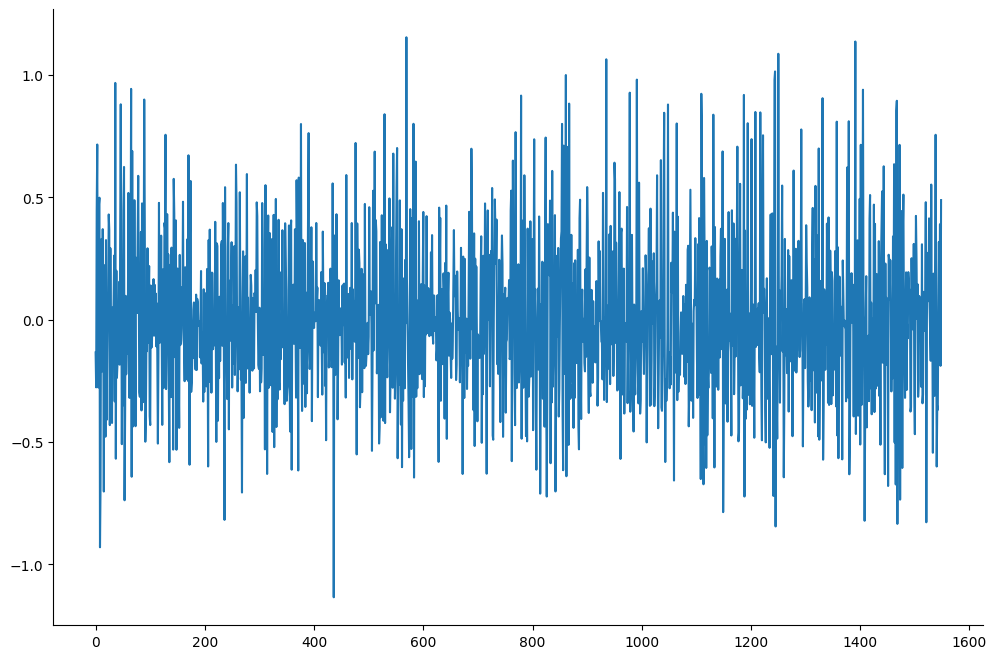

In [ ]:
var['ADA-USD'][0:1550].plot(figsize=(12, 8))


<Axes: >

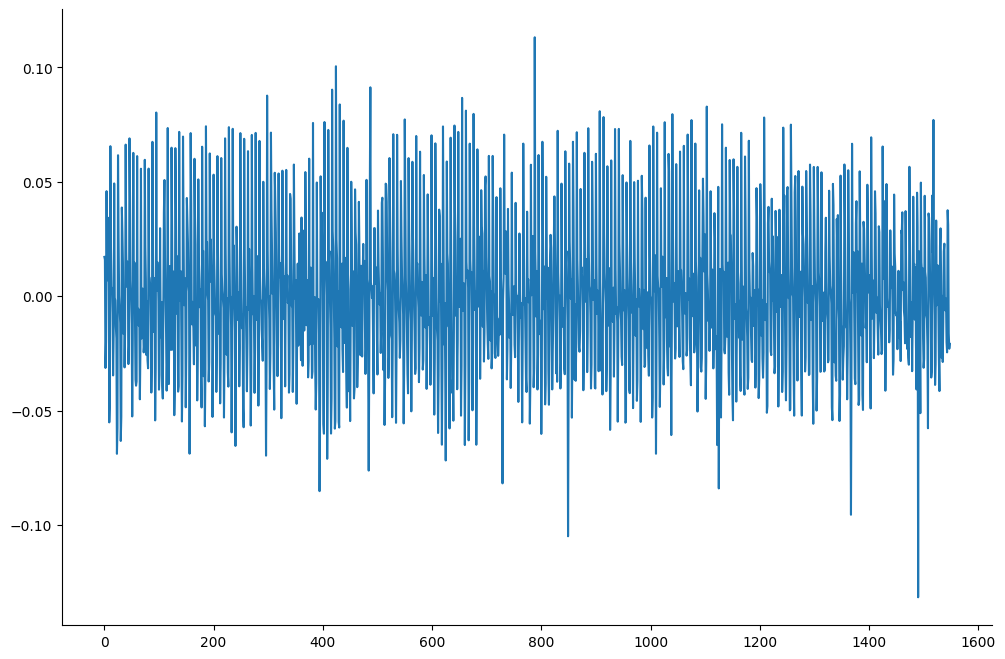

In [ ]:
var['Power'][0:1550].plot(figsize=(12, 8))


<Axes: >

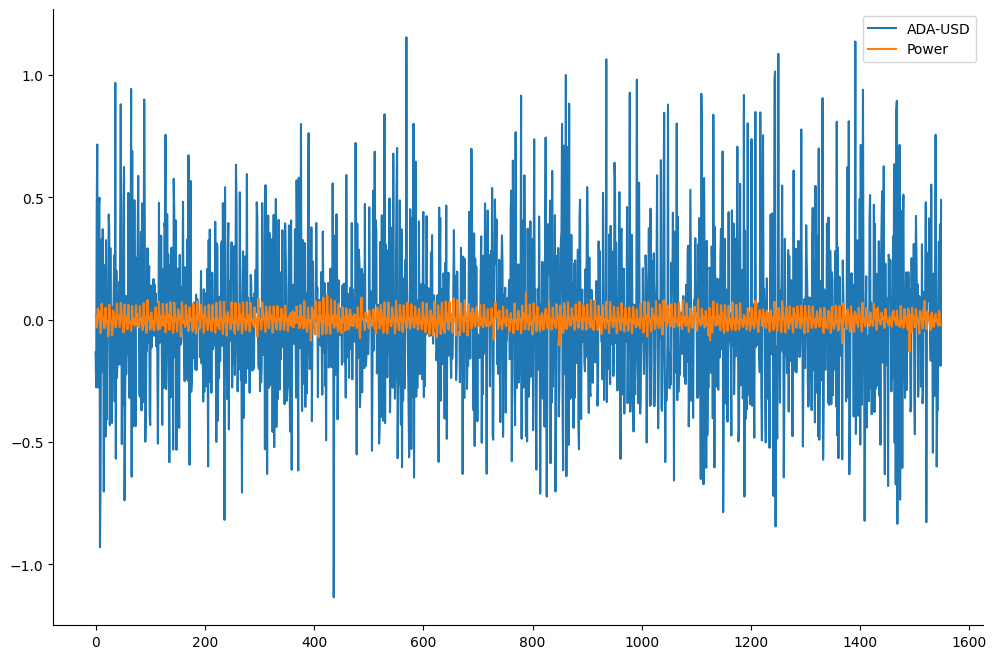

In [ ]:
var[['ADA-USD', 'Power']][0:1550].plot(figsize=(12, 8))


In [ ]:
df=pd.DataFrame(ADAUSD_var)
x = df.to_numpy()
df1=pd.DataFrame(output_var)
S= df1.to_numpy()

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x,S,train_size=0.85,shuffle= False)


In [ ]:
df

,ADA-USD
0,-0.133797
1,-0.276461
2,0.448817
3,0.716078
4,-0.117139
...,...
1544,0.317827
1545,0.055900
1546,0.390388
1547,-0.188504


In [ ]:
df1

,Power
0,0.017161
1,0.015954
2,-0.031367
3,-0.020110
4,0.045889
...,...
1544,0.037557
1545,0.031142
1546,-0.016223
1547,-0.022966


In [ ]:
len(x_valid)

233

In [ ]:
len(y_valid)
# len(y_train)

233

In [ ]:
len(x_train)

1316

In [ ]:
# # Concatenate input features and target variable for the validation set
# valid_data = np.column_stack((x_valid, y_valid))

In [ ]:
basis_function = Polynomial(degree=3)

model = FROLS(
    order_selection=True,
    n_terms=50,
    extended_least_squares=False,
    ylag=15,
    xlag=15,   
    info_criteria='bic',
    estimator='least_squares',
    basis_function=basis_function
)

/usr/local/lib/python3.10/dist-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


In [ ]:
model.fit(X=x_train, y=y_train)

In [ ]:
yhat = model.predict(X=x_valid, y=y_valid, steps_ahead=None)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)

0.6576051165222632
                Regressors   Parameters             ERR
0                   y(k-7)   5.1004E-01  6.90651619E-01
1                  y(k-14)   4.6268E-01  5.55633783E-02
2     y(k-14)y(k-11)y(k-4)  -8.0028E+01  7.98138396E-03
3         y(k-14)y(k-10)^2  -5.4656E+01  4.62018632E-03
4                y(k-14)^3  -2.8895E+01  4.43283502E-03
5     y(k-15)y(k-14)y(k-7)  -3.7369E+01  5.05780455E-03
6                   y(k-1)   1.1990E-01  4.54271054E-03
7            y(k-12)y(k-5)  -2.1247E+00  5.32708830E-03
8             y(k-7)y(k-2)  -2.4893E+00  3.94062809E-03
9           y(k-6)^2y(k-2)  -7.9212E+00  2.83007227E-03
10            y(k-7)y(k-1)  -3.8442E+00  3.70936476E-03
11          y(k-4)y(k-3)^2  -3.9901E+01  2.78369477E-03
12                y(k-7)^3  -3.8393E+01  2.53158659E-03
13  x1(k-15)x1(k-10)y(k-3)   4.0085E-01  1.91703398E-03
14  x1(k-15)x1(k-11)y(k-3)   6.3954E-01  2.03544760E-03
15   x1(k-13)x1(k-7)y(k-3)   5.4352E-01  1.91460897E-03
16    x1(k-7)x1(k-3)y(k-9)  -

In [ ]:
r["ERR"] = pd.to_numeric(r["ERR"], downcast="float") 
    
print('Sum of ERR=  ',r['ERR'].sum())  

Sum of ERR=   0.84730947


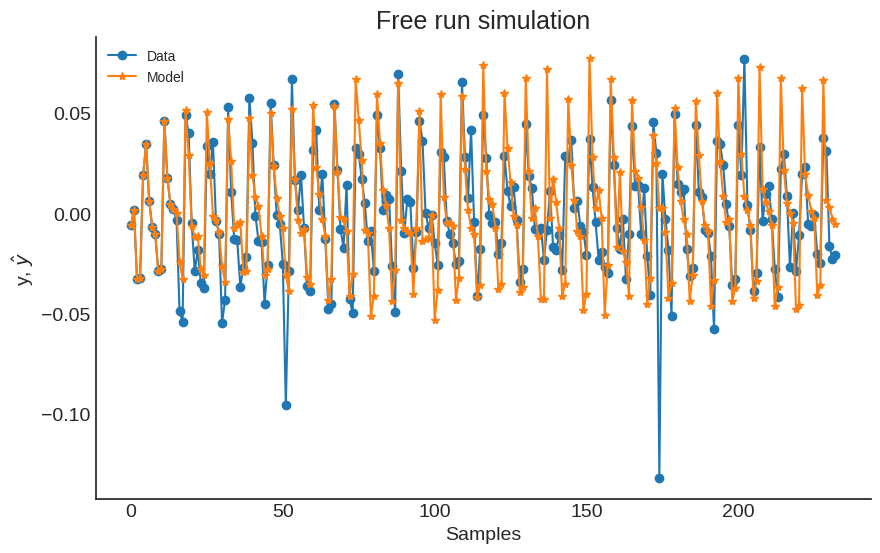

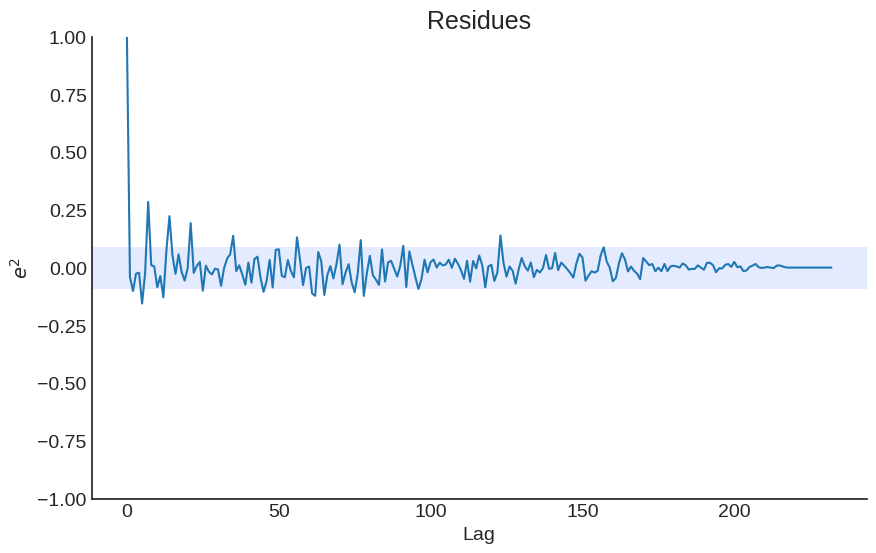

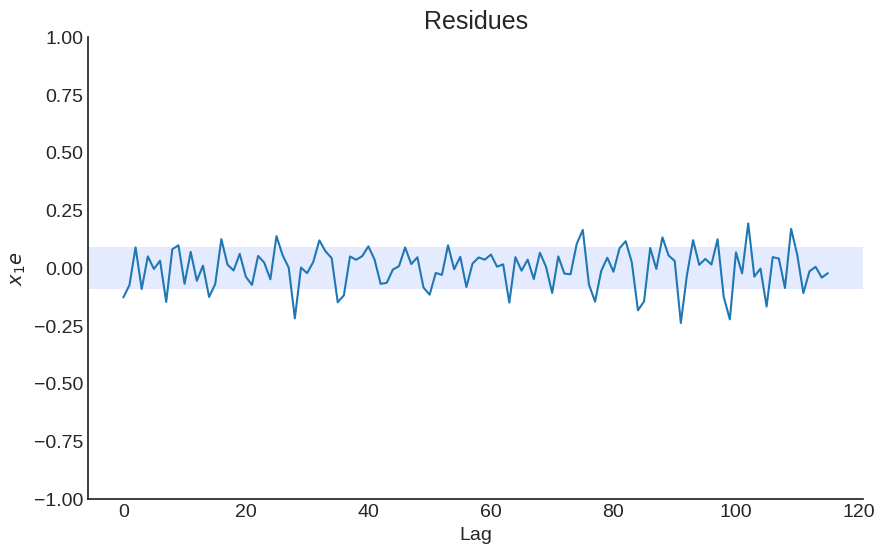

In [ ]:
plot_results(y=y_valid, yhat = yhat, n=250)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

0.7680088407123202


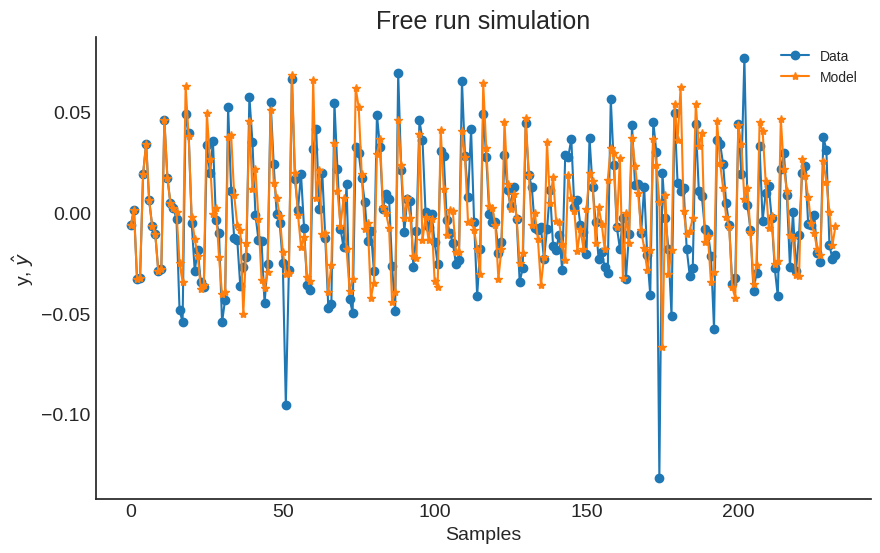

In [ ]:
yhat = model.predict(X=x_valid, y=y_valid, steps_ahead=1)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)
plot_results(y=y_valid, yhat = yhat, n=250)


0.7726974979350649


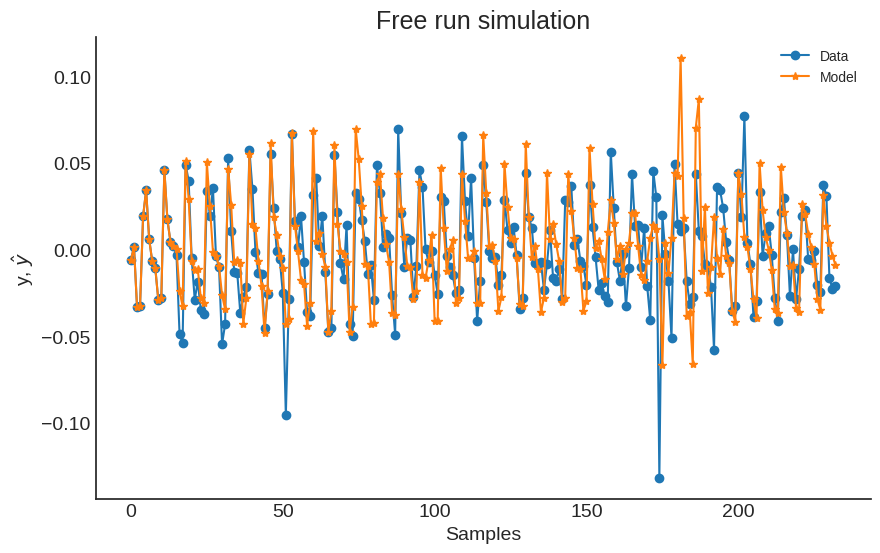

In [ ]:
yhat = model.predict(X=x_valid, y=y_valid, steps_ahead=20)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)
plot_results(y=y_valid, yhat = yhat, n=250)

In [ ]:
t2 = var['Date'][1316:1549]

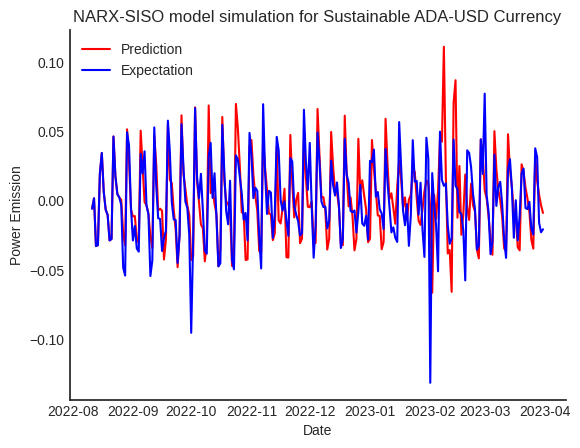

In [ ]:
plt.plot(t2, yhat, label = "Prediction", color='red')

# plotting the line 2 points 
plt.plot(t2, y_valid, label = "Expectation", color='blue')
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Power Emission')
# Set a title of the current axes.
plt.title('NARX-SISO model simulation for Sustainable ADA-USD Currency')
# show a legend on the plot
plt.legend()
plt.savefig('SISO_fw.png')

In [ ]:
len(yhat)

233

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(yhat, S[1316:1549])

rmse(yhat, y_valid)

0.022861399706851335

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(S[1316:1549], yhat, squared=False)
rms

0.022861399706851335

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_valid, yhat)
mae

0.015060985233850287

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_valid, yhat)
mape

1.669737125467897

In [ ]:
from numpy import savetxt
savetxt('yhat.csv', yhat, delimiter=',')
r.to_csv('Model_Structure.csv')
df_1 = pd.DataFrame(S[1316:1549], columns=['Expectation-O/P'])
df_1

,Expectation-O/P
0,-0.005954
1,0.001540
2,-0.032940
3,-0.032259
4,0.019253
...,...
228,0.037557
229,0.031142
230,-0.016223
231,-0.022966


In [ ]:
df_1['Prediction-O/P'] = yhat
df_1

,Expectation-O/P,Prediction-O/P
0,-0.005954,-0.005954
1,0.001540,0.001540
2,-0.032940,-0.032940
3,-0.032259,-0.032259
4,0.019253,0.019253
...,...,...
228,0.037557,0.031387
229,0.031142,0.013853
230,-0.016223,0.004005
231,-0.022966,-0.003546


In [ ]:
len(df_1)
df_1.columns

Index(['Expectation-O/P', 'Prediction-O/P'], dtype='object')

In [ ]:
import plotly.express as px 
import pandas as pd 
import numpy as np 

# data
fig = px.line(df_1, x=var ['Date'][1316:1549], y= df_1.columns[0:2],labels=dict(value="Power Emission"),title="NARX-SISO model simulation for Sustainable ADA-USD Currency")

# Show plot 
fig.show()

In [ ]:
import plotly.graph_objects as go

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x= var['Date'][1316:1549], y=df_1["Expectation-O/P"], name="Expectation", mode="lines"))
fig2.add_trace(go.Scatter(x= var['Date'][1316:1549], y=df_1["Prediction-O/P"], name="Prediction", mode="lines"))
fig2.update_layout(
    title="NARX-SISO model simulation for Sustainable ADA-USD Currency", xaxis_title="Year", yaxis_title="Power Emission"
)
fig2.show()